In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
N = big5_sc.loc[:, "N1":"N10"]

In [5]:
N.loc[:,"score"] = big5_sc.loc[:,"N_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_16820\1958739659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N.loc[:,"score"] = big5_sc.loc[:,"N_SC"]


In [6]:
N

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,score
0,5,5,4,5,5,5,5,5,5,5,49
1,4,3,2,2,3,2,3,4,4,2,29
2,1,1,1,5,1,1,1,1,1,1,14
3,1,4,2,2,2,1,1,1,2,1,17
4,3,3,3,4,3,3,3,3,3,2,30
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,3,1,3,2,1,2,2,2,2,19
19715,4,4,4,4,3,4,4,4,4,4,39
19716,1,1,1,1,1,1,1,1,1,1,10
19717,2,3,1,2,2,2,2,2,2,2,20


In [7]:
categorys = []
for val in N['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
N['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_16820\1277869756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N['C'] = categorys


In [8]:
N

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,score,C
0,5,5,4,5,5,5,5,5,5,5,49,1
1,4,3,2,2,3,2,3,4,4,2,29,0
2,1,1,1,5,1,1,1,1,1,1,14,0
3,1,4,2,2,2,1,1,1,2,1,17,0
4,3,3,3,4,3,3,3,3,3,2,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,3,1,3,2,1,2,2,2,2,19,0
19715,4,4,4,4,3,4,4,4,4,4,39,1
19716,1,1,1,1,1,1,1,1,1,1,10,0
19717,2,3,1,2,2,2,2,2,2,2,20,0


In [9]:
N_train_X, N_train_y = N.iloc[:int(len(N.index)*0.8), :-2], N.iloc[:int(len(N.index)*0.8), -1]
N_test_X, N_test_y = N.iloc[int(len(N.index)*0.8):, :-2], N.iloc[int(len(N.index)*0.8):, -1]
N_test_X = N_test_X.reset_index(drop=True)

In [10]:
N_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
N_classifier.fit(N_train_X, N_train_y)

N_train_score = N_classifier.score(N_train_X, N_train_y)
print(N_train_score)

N_score = N_classifier.score(N_test_X, N_test_y)
print(N_score)

0.9982250396196514
0.9594320486815415


In [11]:
N_train_y_pred = N_classifier.predict(N_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(N_train_y), (N_train_y != N_train_y_pred).sum()))
print('정확도 : %.2f' %((len(N_train_y) - (N_train_y != N_train_y_pred).sum()) / len(N_train_y)))

총 학습 개수 : 15775, 오류개수 : 28
정확도 : 1.00


In [12]:
N_y_pred = N_classifier.predict(N_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(N_test_y), (N_test_y != N_y_pred).sum()))
print('정확도 : %.2f' %((len(N_test_y) - (N_test_y != N_y_pred).sum()) / len(N_test_y)))

총 테스트 개수 : 3944, 오류개수 : 160
정확도 : 0.96


feature ranking:
1. feature N8 (0.201)
2. feature N6 (0.183)
3. feature N7 (0.175)
4. feature N9 (0.088)
5. feature N1 (0.086)
6. feature N10 (0.071)
7. feature N3 (0.054)
8. feature N2 (0.053)
9. feature N5 (0.049)
10. feature N4 (0.040)


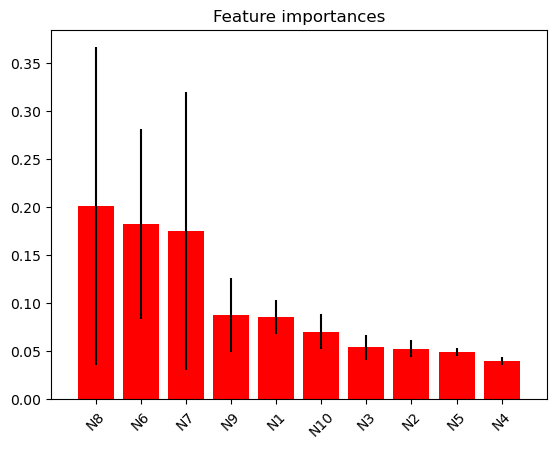

In [13]:
importances = N_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in N_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(N_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, N_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(N_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(N_train_X.columns)), N_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(N_train_X.columns)])
plt.show()

In [15]:
random.seed(0)
shuffled_scores = {}

for feature in N_train_X.columns:
    copy = N_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = N_classifier.score(copy, N_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'N1': 0.9415530903328051, 'N2': 0.9587955625990491, 'N3': 0.9604437400950872, 'N4': 0.9708399366085578, 'N5': 0.9575911251980983, 'N6': 0.9343898573692552, 'N7': 0.946053882725832, 'N8': 0.9430744849445325, 'N9': 0.9499207606973059, 'N10': 0.945229793977813}


In [16]:
print("Original Classfication Accuracy : %.4f"%N_train_score)
for n in range(len(N_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[N_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9982
1 high importance shuffled Accuracy : 0.9431
2 high importance shuffled Accuracy : 0.9344
3 high importance shuffled Accuracy : 0.9461
4 high importance shuffled Accuracy : 0.9499
5 high importance shuffled Accuracy : 0.9416
6 high importance shuffled Accuracy : 0.9452
7 high importance shuffled Accuracy : 0.9604
8 high importance shuffled Accuracy : 0.9588
9 high importance shuffled Accuracy : 0.9576
10 high importance shuffled Accuracy : 0.9708


In [17]:
random.seed(0)
shuffled_scores = {}

for feature in N_test_X.columns:
    copy = N_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = N_classifier.score(copy, N_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'N1': 0.9221602434077079, 'N2': 0.934077079107505, 'N3': 0.9358519269776876, 'N4': 0.9457403651115619, 'N5': 0.9421906693711968, 'N6': 0.925709939148073, 'N7': 0.9287525354969574, 'N8': 0.9234279918864098, 'N9': 0.9312880324543611, 'N10': 0.9236815415821501}


In [18]:
print("Original Classfication Accuracy : %.4f"%N_score)
for n in range(len(N_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[N_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9594
1 high importance shuffled Accuracy : 0.9234
2 high importance shuffled Accuracy : 0.9257
3 high importance shuffled Accuracy : 0.9288
4 high importance shuffled Accuracy : 0.9313
5 high importance shuffled Accuracy : 0.9222
6 high importance shuffled Accuracy : 0.9237
7 high importance shuffled Accuracy : 0.9359
8 high importance shuffled Accuracy : 0.9341
9 high importance shuffled Accuracy : 0.9422
10 high importance shuffled Accuracy : 0.9457


In [19]:
N2_se_train_X = N_train_X.copy()
N2_se_train_X = N2_se_train_X.loc[:, ["N8", "N6"]]

N2_se_test_X = N_test_X.copy()
N2_se_test_X = N2_se_test_X.loc[:, ["N8", "N6"]]
N2_se_test_X = N2_se_test_X.reset_index(drop=True)

N2_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
N2_se_classifier.fit(N2_se_train_X, N_train_y)

N2_se_score = N2_se_classifier.score(N2_se_train_X, N_train_y)
print(N2_se_score)

N2_se_test_score = N2_se_classifier.score(N2_se_test_X, N_test_y)
print(N2_se_test_score)

0.8560380348652932
0.8585192697768763


In [20]:
N3_se_train_X = N_train_X.copy()
N3_se_train_X = N3_se_train_X.loc[:, ["N8", "N6","N7"]]

N3_se_test_X = N_test_X.copy()
N3_se_test_X = N3_se_test_X.loc[:, ["N8", "N6","N7"]]
N3_se_test_X = N3_se_test_X.reset_index(drop=True)

N3_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
N3_se_classifier.fit(N3_se_train_X, N_train_y)

N3_se_score = N3_se_classifier.score(N3_se_train_X, N_train_y)
print(N3_se_score)

N3_se_test_score = N3_se_classifier.score(N3_se_test_X, N_test_y)
print(N3_se_test_score)

0.8651664025356577
0.8633367139959433


In [21]:
N4_se_train_X = N_train_X.copy()
N4_se_train_X = N4_se_train_X.loc[:, ["N8", "N6","N7","N9"]]

N4_se_test_X = N_test_X.copy()
N4_se_test_X = N4_se_test_X.loc[:, ["N8", "N6","N7","N9"]]
N4_se_test_X = N4_se_test_X.reset_index(drop=True)

N4_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
N4_se_classifier.fit(N4_se_train_X, N_train_y)

N4_se_score = N4_se_classifier.score(N4_se_train_X, N_train_y)
print(N4_se_score)

N4_se_test_score = N4_se_classifier.score(N4_se_test_X, N_test_y)
print(N4_se_test_score)

0.8870998415213946
0.8780425963488844


In [23]:
N5_se_train_X = N_train_X.copy()
N5_se_train_X = N5_se_train_X.loc[:, ["N8", "N6","N7","N9","N1"]]

N5_se_test_X = N_test_X.copy()
N5_se_test_X = N5_se_test_X.loc[:, ["N8", "N6","N7","N9","N1"]]
N5_se_test_X = N5_se_test_X.reset_index(drop=True)

N5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
N5_se_classifier.fit(N5_se_train_X, N_train_y)

N5_se_score = N5_se_classifier.score(N5_se_train_X, N_train_y)
print(N5_se_score)

N5_se_test_score = N5_se_classifier.score(N5_se_test_X, N_test_y)
print(N5_se_test_score)

0.9250713153724247
0.9061866125760649


In [24]:
N6_se_train_X = N_train_X.copy()
N6_se_train_X = N6_se_train_X.loc[:, ["N8", "N6","N7","N9","N1","N10"]]

N6_se_test_X = N_test_X.copy()
N6_se_test_X = N6_se_test_X.loc[:, ["N8", "N6","N7","N9","N1","N10"]]
N6_se_test_X = N6_se_test_X.reset_index(drop=True)

N6_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
N6_se_classifier.fit(N6_se_train_X, N_train_y)

N6_se_score = N6_se_classifier.score(N6_se_train_X, N_train_y)
print(N6_se_score)

N6_se_test_score = N6_se_classifier.score(N6_se_test_X, N_test_y)
print(N6_se_test_score)

0.9554358161648178
0.9211460446247465


6